<a href="https://colab.research.google.com/github/ahmedshuvo969/quora-insincere-questions-classification/blob/master/bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Introduction**

In [0]:
#Loading the Dataset
import pandas as pd
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
len_train = len(df)
len_test = len(df_test)



In [2]:
#Train data Head

df.head(3)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0


In [3]:
#Testing Data Head

df_test.head(3)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...


In [4]:
#Class Distribution

df['target'].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

In [5]:

#percentage of sincere and insincere questions
count_sin = 0
for i in range(len_train):
    if df['target'][i] == 1:
        count_sin += 1
count_insin = len_train - count_sin

print('percent of sincere is : ', (count_sin/len_train)*100)
print('percent of insincere is : ', (count_insin/len_train)*100)

percent of sincere is :  6.187017751787352
percent of insincere is :  93.81298224821265


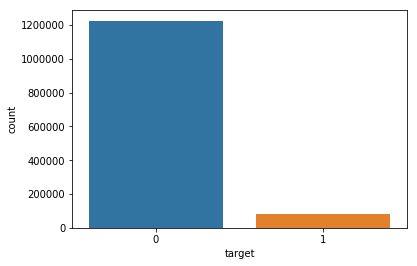

In [6]:
import seaborn as sns
sns.countplot(df['target'])

In [7]:
#Check missing or nan value
df.isnull().sum() #absent of missing value

qid              0
question_text    0
target           0
dtype: int64

# **Pre_Processing**

In [9]:
#Training Dataset
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
sentences = []
for i in range(0, len_train):
    review = re.sub('[^a-zA-Z]', ' ', df['question_text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    sentences.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:

#Testing Dataset
test_sentences = []
for i in range(0, len_test):
    review = re.sub('[^a-zA-Z]', ' ', df_test['question_text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    test_sentences.append(review)

In [0]:
#separating the labels

labels=[]
for i in range(len(df)):
  labels.append(df['target'][i])
  

In [0]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels= train_test_split(sentences, labels, test_size=0.1, shuffle= True)

In [13]:
#Data Summary
#lenth of train data
print(" Train Data Lenght: ", len_train)
#lenght of test data
print(" Test Data Length: ", len_test)
print('No. of Training Examples: ',len(train_sentences))
print('No. of Validation Examples: ',len(val_sentences))
print('No. of Classes: ',df['target'].nunique())

 Train Data Lenght:  1306122
 Test Data Length:  375806
No. of Training Examples:  1175509
No. of Validation Examples:  130613
No. of Classes:  2


# **BofW Models**

## **Naive Bayes Classifier**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow',CountVectorizer()),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',MultinomialNB())
                   ])

Test Accuracy using MultiNomial Naive Bayes Classifier:  0.940848154471607
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    122466
           1       0.74      0.08      0.14      8147

    accuracy                           0.94    130613
   macro avg       0.84      0.54      0.56    130613
weighted avg       0.93      0.94      0.92    130613

[[122238    228]
 [  7498    649]]


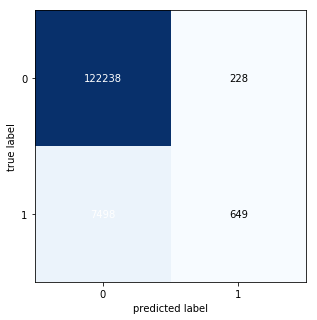

In [15]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using MultiNomial Naive Bayes Classifier: ',accuracy_score(val_labels,pred))

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred))
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### **The classifier has a great accuracy, But the probelms with F1 Score **

## **Logistic Regression**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline=Pipeline([('bow',CountVectorizer()),
                   ('tfidf',TfidfTransformer()),
                   ('classifier',LogisticRegression())
                   ])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Accuracy using Logistic Regression Classifier:  0.9503801306148699
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    122466
           1       0.68      0.38      0.49      8147

    accuracy                           0.95    130613
   macro avg       0.82      0.68      0.73    130613
weighted avg       0.94      0.95      0.94    130613

[[121042   1424]
 [  5057   3090]]


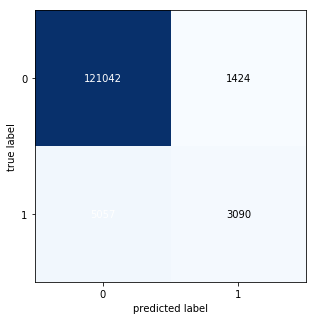

In [19]:
pipeline.fit(train_sentences,train_labels)
pred=pipeline.predict(val_sentences)

from sklearn.metrics import accuracy_score
print('Test Accuracy using Logistic Regression Classifier: ',accuracy_score(val_labels,pred))

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
print(classification_report(val_labels,pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred))
CM = confusion_matrix(val_labels, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

# **Word Embedding Models**

In [20]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


embedding_dim = 300
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=49999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels=np.expand_dims(train_labels, axis=1)
val_labels=np.expand_dims(val_labels, axis=1)


Original Size of Vocabulary:  136959
New Size of Vocabulary:  50000


In [21]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Validation Data: ',val_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Validation Labels: ',val_labels.shape)
print('Dimension of Test Data: ',test_padded.shape)

Dimension of Training Data:  (1175509, 100)
Dimension of Validation Data:  (130613, 100)
Dimension of Training Labels:  (1175509, 1)
Dimension of Validation Labels:  (130613, 1)
Dimension of Test Data:  (375806, 100)


## **Bidirectional LSTM Model**

In [22]:
#Building the Bidirectional LSTM Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNLSTM(64,return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history=model.fit(train_padded, train_labels, epochs=num_epochs, batch_size=512, validation_data=(val_padded,val_labels),callbacks=[reduce],verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 101s 86us/sample - loss: 0.1333 - acc: 0.9494 - val_loss: 0.1221 - val_acc: 0.9523
Epoch 2/5
1175509/1175509 [==============================] - 100s 85us/sample - loss: 0.1201 - acc: 0.9539 - val_loss: 0.1189 - val_acc: 0.9543
Epoch 3/5
1175509/1175509 [==============================] - 99s 84us/sample - loss: 0.1152 - acc: 0.9559 - val_loss: 0.1181 - val_acc: 0.9545
Epoch 4/5
1175509/1175509 [==============================] - 99s 84us/sample - loss: 0.1118 - acc: 0.9574 - val_loss: 0.1172 - val_acc: 0.9545
Epoch 5/5
1175509/1175509 [==============================] - 99s 84us/sample - loss: 0.1084 - acc: 0.9588 - val_loss: 0.1170 - val_acc: 0.9550


In [24]:
#Determining the optimal threshold value to seggregate the classes
pred1 = model.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.501, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred1>thresh).astype(int))))

130613/130613 [==============================] - 4s 33us/sample
F1 score at threshold 0.1 is 0.5282540629193381
F1 score at threshold 0.15 is 0.5683829105923991
F1 score at threshold 0.2 is 0.5949074074074073
F1 score at threshold 0.25 is 0.6121366751713442
F1 score at threshold 0.3 is 0.6240137405399603
F1 score at threshold 0.35 is 0.6259410378713867
F1 score at threshold 0.4 is 0.6186193636420021
F1 score at threshold 0.45 is 0.6037735849056604
F1 score at threshold 0.5 is 0.5783167109133961


The best F1 score is found at threshold 0.35

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122466
           1       0.59      0.67      0.63      8147

    accuracy                           0.95    130613
   macro avg       0.78      0.82      0.80    130613
weighted avg       0.95      0.95      0.95    130613

[[118658   3808]
 [  2701   5446]]


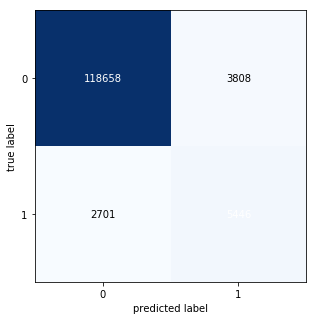

In [25]:
# From above, we can see that F1 score is highest at a threshold of 0.35
pred_val_labels=(pred1>0.35).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels))
CM = confusion_matrix(val_labels, pred_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## **Bidirectional GRU**

In [0]:
#Building the Bidirectional GRU Model
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNGRU(64,return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model_gru.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 5
history_gru=model_gru.fit(train_padded, train_labels, epochs=num_epochs, batch_size=512, validation_data=(val_padded,val_labels),callbacks=[reduce],verbose=1)

Train on 1175509 samples, validate on 130613 samples
Epoch 1/5
1175509/1175509 [==============================] - 90s 77us/sample - loss: 0.1328 - acc: 0.9491 - val_loss: 0.1222 - val_acc: 0.9524
Epoch 2/5
1175509/1175509 [==============================] - 89s 76us/sample - loss: 0.1205 - acc: 0.9539 - val_loss: 0.1195 - val_acc: 0.9530
Epoch 3/5
1175509/1175509 [==============================] - 90s 76us/sample - loss: 0.1156 - acc: 0.9559 - val_loss: 0.1185 - val_acc: 0.9544
Epoch 4/5
1175509/1175509 [==============================] - 90s 76us/sample - loss: 0.1117 - acc: 0.9574 - val_loss: 0.1185 - val_acc: 0.9538
Epoch 5/5
1175509/1175509 [==============================] - 89s 76us/sample - loss: 0.1081 - acc: 0.9588 - val_loss: 0.1185 - val_acc: 0.9545


In [28]:
#Determining the optimal threshold value to seggregate the classes
pred2 = model_gru.predict(val_padded, batch_size=512,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.5, 0.05):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred2>thresh).astype(int))))

130613/130613 [==============================] - 4s 28us/sample
F1 score at threshold 0.1 is 0.5556914546640573
F1 score at threshold 0.15 is 0.591760986115566
F1 score at threshold 0.2 is 0.6111249937528112
F1 score at threshold 0.25 is 0.6199507125254473
F1 score at threshold 0.3 is 0.6207014347529036
F1 score at threshold 0.35 is 0.6177922234260262
F1 score at threshold 0.4 is 0.6107974370360971
F1 score at threshold 0.45 is 0.598781549173194


              precision    recall  f1-score   support

           0       0.98      0.97      0.97    122466
           1       0.58      0.67      0.62      8147

    accuracy                           0.95    130613
   macro avg       0.78      0.82      0.80    130613
weighted avg       0.95      0.95      0.95    130613

[[118500   3966]
 [  2696   5451]]


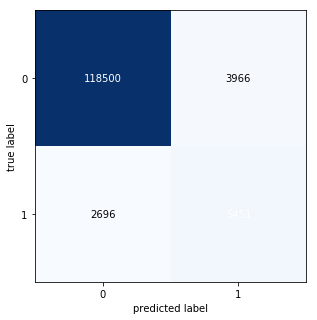

In [29]:
# F1 score is highest at a threshold of 0.3
pred_val_labels_gru=(pred2>0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels_gru))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels_gru))
CM = confusion_matrix(val_labels, pred_val_labels_gru)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()